# Miniproject 2

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Miniprojet2_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# PART 1: Coronavirus, epidemiology  and neural networks  [75 points]
In this exercise we will study the Coronavirus pandemic. This worldwide epidemy (left figure) is to be taken seriously and these exercise are made to show you the importance of acting fast and hard. You can follow the evolution in real time on the following [website](https://ncov2019.live/data).
One key action we can do is what has been called flatten the curve (right figure):
<div>
<img align='right' src="https://ourworldindata.org/uploads/2020/03/Flattening-the-curve-3-2048x1434.png" alt="drawing" width="400"/>
<img align='left' src="https://i.insider.com/5e6f8ee1c48540116e247a42?width=2500&format=jpeg&auto=webp" alt="drawing" width="350"/>
</div>

How and why flattenning this curve is important has been explained in Wulfram's extra [presentation](https://drive.switch.ch/index.php/s/fIkyRGPbepHOoDc). In this exercise we simulate the [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) a well known and fairly understable model in epidemiology. 

First run the code running simulating the fitzhugh_nagumo equations below to make sure everything is installed properly on your computer.

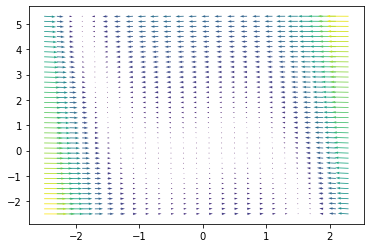

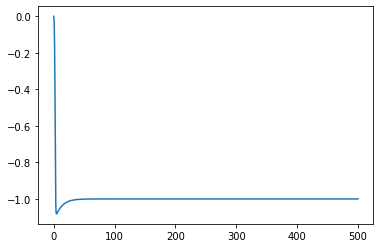

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo
import matplotlib
import networkx as nx 
import matplotlib.pyplot as plt 
import tqdm
fitzhugh_nagumo.plot_flow()
fixed_point = fitzhugh_nagumo.get_fixed_point()
plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

# Exercise 1.1 SIR phase plane [8 points]
Now we start the real work! The module [`neurodynex3.phase_plane_analysis.fitzhugh_nagumo `](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html) allows us to compute the phase plane flow of fitzhugh_nagumo equations.We are going to use it to plot the SIR model behavior.\
The SIR model can be written as follow:

$\frac{dI}{dt} = \frac{\beta}{N}SI - \gamma I$\
$\frac{dS}{dt} = - \frac{\beta}{N}SI$

1.1.1 Give an intuition behind the constants $\beta$ and $\gamma$ [2 points] (< 2 lines)

1.1.2 We often hear about the $R_0$ of an epidemy, in the SIR model $R_0 = \frac{\beta}{\gamma}$ Give an intuition behind this constant. [2 points] (< 2 lines)

1.1.3 Copy the function [`plot_flow()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html), replace the fitzhugh nagumo model by the SIR model and plot the flow. [4 points]


your answer for 1.1.1 and 1.1.2

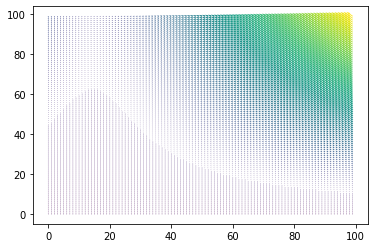

In [58]:
#1.3 plot flow
beta = 0.2692307692307693
gamma = 1.0/13.0
N = 100

def plot_flow(beta=1.0, gamma = 1.0, N = 100):
    """Plots the phase plane of the SIR model
    for given model parameters.

    Args:
        beta: Infection rate 
        gamma: recovery rate
        N: Population
    """

    # define the interval spanned by voltage v and recovery variable w
    # to produce the phase plane
    ss = np.arange(0, N, N/100)
    ii = np.arange(0, N, N/100)
    (SS, II) = np.meshgrid(ss, ii)

    # Compute derivative of S and I according to SIR model equations
    dS = -beta*SS*II/N
    dI = beta*SS*II/N - gamma*II
    vel = np.sqrt(dS**2 + dI**2)

    # Use quiver function to plot the phase plane
    plt.quiver(SS, II, dS, dI, vel)
    
plot_flow(beta,gamma,N)

# Exercise 1.2 SIR Trajectory [15 points]
In order to plot the trajectory of a given initial condition we use a simple [forward euler](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node3.html) to solve the SIR model over time.

#### for all 1.2 questions we use $\gamma = \frac{1}{20}$, $I_0 = 100$ and $N=10^7$


1.2.1 Fill the question marks in the function `get_trajectory()` below so that the function returns the trajectory $(S(t), I(t))$ from an initial point $S_0$, $I_0$.  (initial number of non infected/infected)[7 points]

1.2.2 Plot on the same graph the phase plane trajectory of an epidemy for given $R_0$s and $I_0$. [2 points]

1.2.3 Plot on the same graph the evolution on infected people over time for given $R_0$s and $I_0$. [2 points]

Flattening the curve allows to avoid high peak of infected people at the same time. Here, we want to show that acting on $R_0$ allows great flattening of the curve.

1.2.4 Add on the graph of 1.2.3 an horizontal line showing a theoretical 10% of the population hospital saturation threshold. [1 point]

1.2.5 Comment [3 points] (< 3 lines)

In [59]:
## 1.2.1
def get_trajectory(gamma, R0, I0, N, tend=1000):
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []
    beta = gamma*np.array(R0)
    dt = 0.1 ## forward euler time step
    
    for i in range(len(beta)):
        S = N - I0
        I = I0
        for step in range(int(tend/dt)):   
        
            record['t'].append(step*dt)
            record['I'].append(I)
            record['S'].append(S)
            record['R'].append(N - S - I)
            dIdt = beta[i]*S*I/N - gamma*I
            dSdt = -beta[i]*S*I/N
            new_S = S + dSdt*dt
            new_I = I + dIdt*dt
            S = new_S
            I = new_I
            

            
    return np.array([np.array(record['t']),np.array(record['S']),np.array(record['I'])])


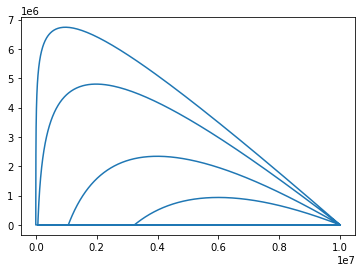

In [60]:
## 1.2.2, 1.2.3 and 1.2.4
N = 1e7
I0 = 100
R0s = [10,5,5/2,5/3]
[t,S,I] = get_trajectory(gamma, R0s, I0, N, 1000)
plt.plot(S,I)
plt.show()

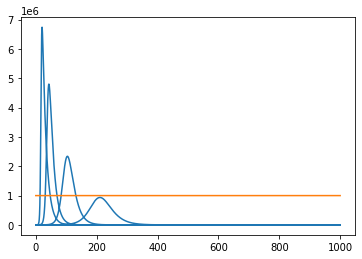

In [61]:
plt.plot(t,I)
capacity = (0.1*N)*np.ones(len(t))
plt.plot(t,capacity)
plt.show()

Answer of 1.2.5

# Exercise 1.3 SIR Analysis [18 points]

Now that you are a bit familiar with the SIR model, we want to do a bit of analysis over the parameters. Every action (or policies), done by a government allows to act on the $R_0$ of the model.  
- First, we want you to run trajectories for different actions of a government. We consider an action when the government acts on $R_0$ for a given time, e.g. quarantine of the population.

#### for all 1.3 questions we use $\gamma = \frac{1}{20}$, $I_0 = 100$ and $N=10^7$

1.3.1 Update the `get_trajectory` function so that $R_0$ can change during the simulation (look at the modulation dictionary), now `get_trajectory` should return the maximum of the infected peak. [2 points]

1.3.2 Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time of policy from $1$ to $200$ days. [2 points]

1.3.3 Plot the 2D matrix of maximum infected cases obtained in question 1.3.2. On the x axis we want the duration of quarantine, and $R_0$ on the y axis. Comment [2 + 3 points] (< 3 lines)

1.3.4 In question 1.3.2 we consider that people go back to their usual life at the end of the quarantine $R_0$ back to $2.3$. Now add a transition phase where people are "careful", $R_0$ of $1.5$ for 150 days, do you see any difference? [2 points] (< 1 line)

Now we study the impact of a delay in the intervention after the outbreak. In other words, we want to know how long we can wait before a government takes actions.

1.3.5  Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time $\textbf{before we start the quarantine}$ from $1$ to $200$ days. In this question we consider a quarantine duration of 50 days. Plot the 2D matrix of maximum infected cases. On the x axis we want the time before the start of quarantine, and $R_0$ on the y axis. $\textbf{For both careful and non careful population}$.
Comment [2 + 3 points] (< 3 lines)

1.3.6 Design a government policy so that the amount of infected people never goes above 6% of the population, $\textbf{for both careful and non careful population}$ Comment. [2 points] (< 2 lines)

$\textbf{Constraints:}$ 
1. Max quarantine time 50 days with min $R_0 = 0.5$
2. For careful transition max time $100$ days and min $R_0= 1.5$. 

In [20]:
## 1.3.1
def get_trajectory(gamma, R0, I0, N, tend=1000, modulation=None):
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []
    dt = 0.1 ## forward euler time step
    R0_arr = R0*np.ones(tend) 
    S = N - I0
    I = I0
    if modulation:
        for day in range(tend):
            if day<=modulation['days']: R0_arr[day] = modulation['R0']

    beta = gamma*R0_arr
    for step in range(int(tend/dt)):   
    
        record['t'].append(step*dt)
        record['I'].append(I)
        record['S'].append(S)
        record['R'].append(N - S - I)
        dIdt = beta[int(step*dt)]*S*I/N - gamma*I
        dSdt = -beta[int(step*dt)]*S*I/N
        new_S = S + dSdt*dt
        new_I = I + dIdt*dt
        S = new_S
        I = new_I
            
    return max(record['I'])

modulation = {}
modulation['days'] = 200
modulation['R0'] = 2.1
print(get_trajectory(1/20, 2.3, 100, 1e7, tend=1000, modulation=modulation)/1e7)
print(R0s,policy_days)


0.17898793946026736
[0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3] [  1.          23.11111111  45.22222222  67.33333333  89.44444444
 111.55555556 133.66666667 155.77777778 177.88888889 200.        ]


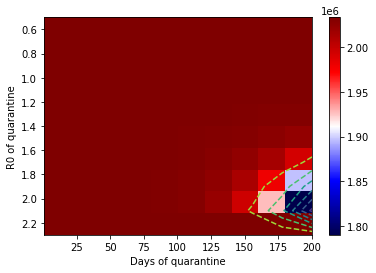

In [32]:
# 1.3.2 + 1.3.3
N =1e7
R0_min = 0.5
R0_max = 2.3
policy_min = 1
policy_max = 200
R0s = np.linspace(R0_min,R0_max,10)
policy_days = np.linspace(policy_min,policy_max,10)
I0 = 100
gamma = 1/20
modulation = {}
I_mat = np.zeros((len(policy_days),len(R0s)))
for i in range(len(policy_days)):
    for j in range(len(R0s)):
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = policy_days[i]
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = R0s[j]
        I_mat[i,j] = get_trajectory(gamma, R0_max, I0, N, tend=1000, modulation=modulation)

plt.imshow(np.transpose(I_mat),extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days,R0s,np.transpose(I_mat),linestyles = 'dashed') ## shows 10% contour
plt.show()


Answer 1.3.3

In [226]:
# 1.3.4
N =1e7
R0s = np.linspace(??,??,10)
policy_days = np.linspace(??,??,10)

modulation = {}
for ?? in ??:
    for ?? in ??:
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [100,???,???,1000 - ???]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3,???,???,2.3]
        
plt.imshow(???,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(days,Rs,Res,[0,0.1],linestyles = 'dashed') ## shows 10% contour
plt.show()

SyntaxError: invalid syntax (<ipython-input-226-5918da9b1165>, line 3)

Answer 1.3.4

In [227]:
# 1.3.5

Answer 1.3.5

In [228]:
# 1.3.6

Answer 1.3.6

# Exercise 1.4 Model infections with Networks [15 points]

So far we have studied a simple model of infection. This model is a simplification of propagation of an infection in a fully connected graph. We are now going to implement two types of graph and compare the results to the SIR model.
For this we need the python library [networkx](https://networkx.github.io/) and for comfort [tqdm](https://pypi.org/project/tqdm/)
(simply use pip install networkx and pip install tqdm in your terminal).

The study of the graphs allows a better understanding of the [importance of social distancing](https://corona.katapult-magazin.de/).
<div>
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Erdos_generated_network-p0.01.jpg">
  <figcaption >Example Erdős–Rényi graph.</figcaption>
</figure> 
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img style="width:50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/18-vertex_zero-symmetric_graph.svg/200px-18-vertex_zero-symmetric_graph.svg.png">
  <figcaption >Example of a K-connected graph.</figcaption>
</figure> 
   </div>

1.4.1 In the part we implement 2 different graphs:
- Erdős–Rényi graph: random connected graph, with sparsity $s$.
- random regular graph: random connected graph with $\textbf{exactly } K$ connections per neuron.

create the 2 graphs, with sparsity $s=0.1$ and $N=50$ nodes and plot it [1 point]
(keep this number of nodes more is really long to run).

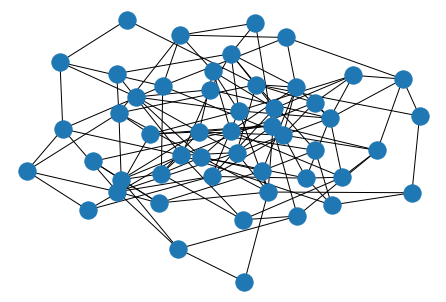

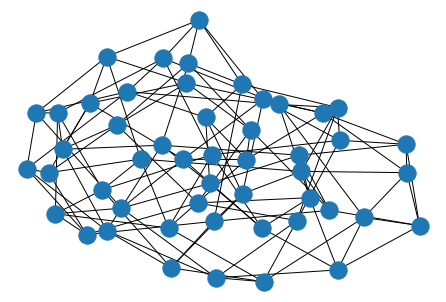

In [229]:
import tqdm
import networkx as nx 
N = 50
s = 0.1
K = int(N*s)
G = nx.erdos_renyi_graph(N,s)
G1 = nx.random_regular_graph(K,N,0)
plt.figure(1)
# plt.subplot(2,1,1)
nx.draw(G)
plt.figure(2)
# plt.subplot(2,2,1)
nx.draw(G1)

In order to simulate the propagation of a disease we consider that at each time step we run over the infected nodes. Each infected node $n_1$ can infect a susceptible connected node $n_2$ with probability:

$P(n_2 = S\rightarrow n_2 = I|n_1 = I) = \frac{\beta \Delta_t}{N\cdot s}$.

$P(n_2 = S\rightarrow n_2 = I|n_1 = S) = 0$,

where s is the sparsity of the network. Each infected node $n_1$ has the probability to be cured:

$P(n_1 = I\rightarrow n_1 = C) = \gamma  \Delta_t$

where $I$ stands for the infected node, $S$ the susceptible nodes and $C$ the cured ones.

1.4.2 Pen&pencil. Show that for a small $\Delta t$ and a fully connected graph with large $N$ the network behaves exactly as the SIR model. [3 points]

1.4.3 Fill the function `simulation_graph` according to the properties we defined in 1.4.2. [4 points]

1.4.4 Run the simulation for fully connected graphs of $N = 100$ nodes and show that you get quantitatively the same results as the SIR model. Run the graphs 10 times for 300 days and plot the average trajectory of infected cases against the SIR model. [3 points]

1.4.5 Run the simulation for sparsely connected graphs with $s=0.1$ and $N = 100$. Explain the differences/similarities you observed.\
[1 + 2 points]

1.4.6 What is the difference between an Erdős–Rényi graph and a K-connected one if $N\rightarrow \infty$. if they are fully connected ? if they are sparsely connected ? [2 points] (< 2 lines)

Answer 1.4.2

In [230]:
def simulation_graph(G,I0,R0,sparsity,tend=1000, dt=0.1 ,modulation = False, average = 20):
    # dt = 0.1 set as argument
    gamma = 1.0/13.0 
    R0s= []
    N = G.number_of_nodes()
    #average = 20 # number of run  for averaging (set as an argument)
    arr_I = np.zeros((average,tend)) #save all infection history over time for each average 
    arr_S = np.zeros((average,tend)) #save all susceptible history over time for each trial 
    
    for trial in range(average):
        I_t = []
        S_t = []
        infected = set(np.arange(0,I0))
        cured = set()
        for i in tqdm.tqdm(range(tend)):
            I_t += [len(infected)]
            S_t += [N - len(infected)- len(cured)]
#             if modulation:
                ## use code from 1.3.1
            R0s += [R0]
            beta = R0*gamma
            P_infection = beta*dt/(N*sparsity)
            P_cure = gamma*dt
            for i in range(int(1/dt)):
                tmp_infected = infected
                tmp_cured = cured
                for node in G.adj: ## run over all connections of a node
                    if node in infected:
                        for S_node in G.adj[node] :
                            if np.random.rand()< P_infection and (S_node not in (cured|infected)):
                                tmp_infected.add(S_node)
                        if np.random.rand() < P_cure:
                            tmp_cured.add(node)
                infected  = tmp_infected - tmp_cured 
                cured = tmp_cured
            
            
        arr_I[trial,:] = np.array(I_t)
        arr_S[trial,:] = np.array(S_t)
    
    return arr_S, arr_I

100%|██████████| 100/100 [00:00<00:00, 520.48it/s]


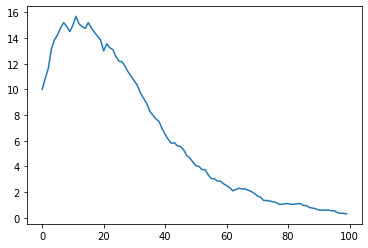

In [231]:
#1.4.4 
I0 = 10
tend = 100
R0 = 2.3
N = 50
s = 1
K = int(N*s)
G = nx.erdos_renyi_graph(N,s)
S,I = simulation_graph(G,I0,R0,s,tend=tend,modulation = False)
plt.plot(np.sum(I,axis=0)/I.shape[0])

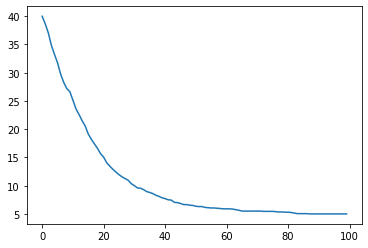

In [232]:
plt.plot(np.sum(S,axis=0)/S.shape[0])

# Exercise 1.5 Non Mean field graph [19 points]

In this question we are going to design a new graph called cluster graph. We created a class cluster_Graph to allow you to have a first experience with classes in python. $\textbf{Do not hesitate to ask questions about it}$. 

1.5.1 Fill the `cluster_Graph` class so that `cluster_Graph.Matrix` returns the binary matrix of connections of a network with $C$ clusters each with the same number of nodes, where the probability of connections within a cluster is $P_{intra}$ and outside $P_{extra}$. [4 points]

#### Sparsness : The sparsness of a graph is defined as $\frac{L}{N^2}$, with $L$ the number of connections in the graph and $N^2$ maximum possible connections 

1.5.2 create one cluster graph, with 4 clusters, $N=50$ nodes, $P_{intra}$ = 1, $P_{extra}$ = 0.02 and plot it [1 point]


1.5.3 Estimate analatically the expected sparseness of the graph function of  $P_{extra}$, $P_{intra}$, the number of nodes per clusters $N_c$ and the total number of nodes $N$. [2 points]

1.5.4 Use `cluster_Graph` to create the matrix a graph of sparsity $s = 0.1$. To do so,  estimate $P_{extra}$ From 1.5.2 knowing that $N=550$ nodes divided in $11$ clusters with $P_{intra} = 1$. Run the graph 10 times for 300 days and plot the average trajectory of infected cases against the SIR model and the other graphs.
#### Important : each initial infected cases must be in the same cluster !
[2 point]


1.5.5 Plot these results against the two previous graphs and the SIR model results. [2 points]

1.5.6 Comment the differences/similarities, what is different in the cluster graph ? [5 points] (< 5 lines)

1.5.7 The last graph has a really particular topology. Yet can you make a parallel between such a graph and hopfield networks ? [3 points] (< 3 lines)

### Bonus (10 points) 
1.5.8 Plot the mean number of infected nodes per cluster over time for one trajectory of the cluster graph. Use the same parameters as 1.5.4. comments [4 points]

1.5.9 Describe three different ways to go from 500 to 1000 neurons in the cluster network. And their impact on the trajectory.  [3 points]
#### Note: Simulations are not mandatory but advised


1.5.10 Additional question about the methods:
- Explain why we average over multiple graphs simulations. [1 point] 
- Explain the utility of $dt$ when simulating our models.  [1 point] 
- In [lecture 7](https://moodle.epfl.ch/pluginfile.php/1781861/mod_resource/content/2/week7new-PopIntro.pdf) we introduced the mean field argument. What difference would you see if we apply the same external current to all nodes between an erdos-rednye vs K-connected graph ? Is the  mean field argument exact (i.e. not an approximation) for any of these networks ?  [1 point]


# Ask about sparsness

Answer 1.5.9

Answer 1.5.10

In [233]:
import numpy as np
from numpy.random import rand 
import networkx as nx
import matplotlib.pyplot as plt

In [234]:
#1.5.1
class cluster_Graph:
    def __init__(self,N, clusters = 0, P_intra = 0.1, P_extra = 0.1):
        self.N = N
        self.nodes = np.arange(N)
        self.clusters = clusters
        self.P_intra = P_intra
        self.P_extra = P_extra
        if clusters > 0:
                self.c_nodes = self.nodes.copy()
                self.c_nodes = self.c_nodes.reshape(clusters,-1)
        else:
            print('cluster is 0 !')
            raise ValueError('cluster is 0 !')
            
        self.create_graph()
        
    def create_graph(self):
        self.Matrix = np.zeros((self.N,self.N))
        
        num_nodes_in_cluster = self.N/ self.clusters
        
        for i in range(self.N):
            for j in range(i+1,self.N):
                
                i_cluster = np.floor(i/num_nodes_in_cluster)
                j_cluster = np.floor(j/num_nodes_in_cluster)
                
                # test if i and j are in the same cluster and test probability to create a link
                if i_cluster == j_cluster and rand() <= self.P_intra:
                    self.Matrix[i,j] = self.Matrix[j,i] = 2
                    
                # test if i and j are in different clusters and test probability to create a link
                elif rand()<= self.P_extra:
                    self.Matrix[i,j] = self.Matrix[j,i] = 1


In [235]:
#1.5.2 
N = 52
num_clusters = 4
P_intra = 1
P_extra = 0.02

CG = cluster_Graph(N=N, clusters=num_clusters, P_intra=P_intra, P_extra=P_extra)

G=nx.from_numpy_matrix(CG.Matrix) #create graph from binary matrix

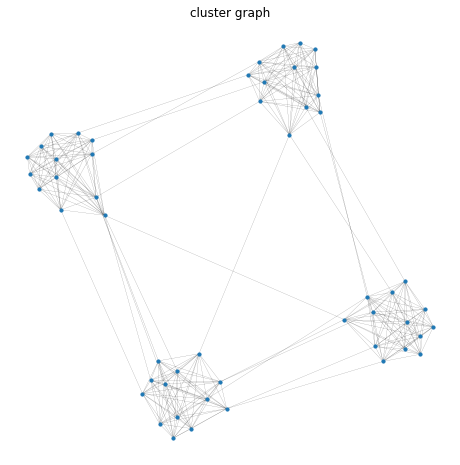

In [236]:
plt.figure(figsize=(8,8))
plt.title('cluster graph')
nx.draw_spring(G, node_size=10, width=0.1, alpha=1)

In [237]:
G.number_of_edges()

332

In [238]:
# 1.5.3 calculate sparsness
from scipy.special import comb

sparsness = G.number_of_edges()/ comb(N, 2)

print('experimentally sparsness is %f'%sparsness)

experimentally sparsness is 0.250377


Answer 1.5.3

analytically each node is in expectation connected to $P_{intra}*N_c + P_{extra}*(N-N_c)$ many nodes. so for N nodes we can multiply this by N except that we are counting the edges twice once for each node of the edge so we divide by 2.

$$ E(\#edges) = N/2* [P_{intra}*N_c + P_{extra}*(N-N_c)]$$

$$sparsity = \frac {E(\#edges)} {\binom{N}{2}}$$

In [239]:
N_c = N / num_clusters

E_edges = N/2 * (P_intra*N_c + P_extra*(N-N_c))

sparsity = E_edges/ comb(N, 2)

print('analytically sparsity is:%f'%sparsity)

analytically sparsity is:0.270196


1.5.4 : solving for the values given we get $P_{extra} = 49/5000$ 

In [240]:
# cheking the answer
N = 550
num_clusters = 11
N_c = N / num_clusters
P_intra = 1
P_extra = 49/5000

E_edges = N/2 * (P_intra*N_c + P_extra*(N-N_c))

sparsity = E_edges/ comb(N, 2)

print('analytically sparsity is:%f'%sparsity)

analytically sparsity is:0.100000


In [241]:
# make the graph
CG = cluster_Graph(N=N, clusters=num_clusters, P_intra=P_intra, P_extra=P_extra)

G=nx.from_numpy_matrix(CG.Matrix) #create graph from binary matrix

# run the graph
dt = 0.01
s = 0.1 
I0 = 10
tend = 300
R0 = 2.3

S,I = simulation_graph(G,I0,R0,s,tend=tend, dt=dt,modulation = False, average=10)

16%|█▌        | 47/300 [00:06<00:32,  7.75it/s]


KeyboardInterrupt: 

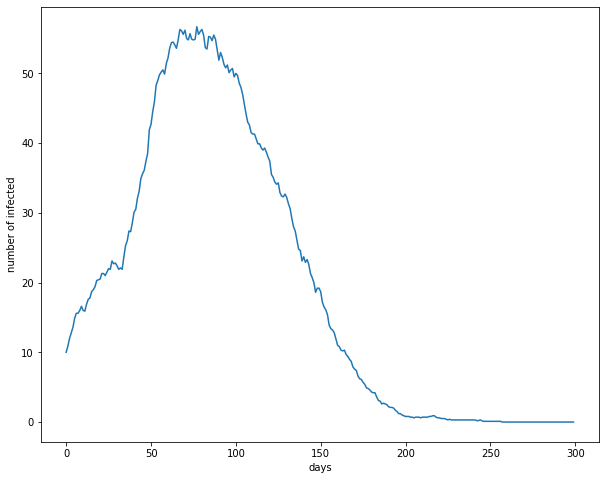

In [33]:
plt.figure(figsize=(10,8))
plt.xlabel('days')
plt.ylabel('number of infected')
plt.plot(np.sum(I,axis=0)/I.shape[0])

Answer 1.5.5

Answer 1.5.6

### Answer 1.5.7:

1.5.6 The last graph has a really particular topology. Yet can you make a parallel between such a graph and hopfield networks ? [3 points] (< 3 lines)

The hopfield network is a fully connected graph such that every neuron communicates with every other neuron this is similar to our fully connected clusters in the 1.5. The inbetween cluster connections can be seen as different hopfield networks communicating; like inhibitory vs excitatory networks in a hopfield network model.

But if we consider each cluster as a node as drawn above all of the clusters are also connected so we get another fully conected graph similar to a single hopfield network.

### 1.5.8

In [34]:
# Bonus 1.5.8
from scipy.ndimage.filters import gaussian_filter1d ## used to smooth the graph 

for i in range(???): ## loop over clusters
    plt.plot(gaussian_filter1d(???,2))
plt.show()

SyntaxError: invalid syntax (<ipython-input-34-0710a7d005b2>, line 4)

Answer 1.5.8

### 1.5.9
Describe three different ways to go from 500 to 1000 neurons in the cluster network. And their impact on the trajectory.

Three ways of increasing the number of neurons:
1. increasing the number of clusters. \
impact: There will be more infectious cases but since the outside cluster connections have a low probability and all the infectious people are in the same cluster; the number of infections will closely resemble the previous case we analysed.
2. increasing the number of nodes in each cluster.\
impact: There will be significantly more infectiouns since in one of our completely connected clusters we have about 40 more people. 

3. ???
 


In [35]:
#1. increasing the number of clusters.
# make the graph
N = 1000
# assume each cluster has fixed number of neurons 50
N_c = 50
num_clusters = int(N/N_c)
P_intra = 1
P_extra = 49/5000

CG = cluster_Graph(N=N, clusters=num_clusters, P_intra=P_intra, P_extra=P_extra)

G=nx.from_numpy_matrix(CG.Matrix) #create graph from binary matrix

# run the graph
dt = 0.01
s = 0.1 
I0 = 10
tend = 300
R0 = 2.3

S,I = simulation_graph(G,I0,R0,s,tend=tend, dt=dt,modulation = False, average=10)

  4%|▎         | 11/300 [00:00<00:13, 22.18it/s]


KeyboardInterrupt: 

# This plot doesn't make sense ! compared to the first plot.

In [27]:
plt.figure(figsize=(10,8))
plt.title('1. increasing the number of clusters.')
plt.xlabel('days')
plt.ylabel('number of infected')
plt.plot(np.sum(I,axis=0)/I.shape[0])

NameError: name 'plt' is not defined

In [28]:
1001/11

91.0

In [29]:
# 2. increasing the number of nodes in each cluster
# make the graph keeping the number of cluster constant
N = 1001
num_clusters = 11
N_c = N / num_clusters
P_intra = 1
P_extra = 49/5000

CG = cluster_Graph(N=N, clusters=num_clusters, P_intra=P_intra, P_extra=P_extra)

G=nx.from_numpy_matrix(CG.Matrix) #create graph from binary matrix

# run the graph
dt = 0.01
s = 0.1 
I0 = 10
tend = 300
R0 = 2.3

S,I = simulation_graph(G,I0,R0,s,tend=tend, dt=dt,modulation = False, average=10)

NameError: name 'nx' is not defined

In [30]:
plt.figure(figsize=(10,8))
plt.title('2. increasing the number of nodes in each cluster.')
plt.xlabel('days')
plt.ylabel('number of infected')
plt.plot(np.sum(I,axis=0)/I.shape[0])

NameError: name 'plt' is not defined

1.5.10:

1. Explain why we average over multiple graphs simulations?
**we average over many simulations because of the randomness involved in the way nodes get infected or are recovered. this way our estimate of the average of different values we calculate becomes more accurate due to the law of large numbers.** 

2. Explain the utility of 𝑑𝑡 when simulating our models ?
**dt is the time steps we divide each day by. also it serves as the number of synchronous steps we take (for each day of the simulation) when we spread the infection or recover the nodes.** 

3. In lecture 7 we introduced the mean field argument. What difference would you see if we apply the same external current to all nodes between an erdos-rednye vs K-connected graph ? Is the mean field argument exact (i.e. not an approximation) for any of these networks ?

**The difference will be that in the k connected network when we increase the number of neurons we don't see any reduction in the variance of the input current from other neurons since they remain k many. But for erdos network the varince decreases since we have on average p*N many neighbours. The mean feild argument is not exact for any of the graphs we make. we can see this by the fact that there is variance in the simulation of these networks in week 7 slides. Also for both types of the networks the connections are random.**


# PART 2: Hopfield Network

## Getting Started
As a start, we are going to create a Hopfield network of 25 Neurons with 4 random patterns stored. We will then set the initial state of the network to one of the patterns with some noise and finally run the network for some iterations.

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# add random patterns to the list
pattern_list = factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5)
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")



ModuleNotFoundError: No module named 'neurodynex3'

## Exercise 2.1: Find the maximum noise tolerance in pattern recovery [6 points]
First we need to set the hopfield network and store some patterns. 

2.1.1. Create a hopfield network with 100 neurons and store 2 random patterns. [1 points]

2.1.2. Run the network for 6 steps after setting as initial state the first of the random patterns with 3 of its bits flipped. Calculate the final overlap with all the patterns. Report if the first pattern was recalled correctly by the network. \
Note: We say that the network has correctly recalled the pattern if the last state has overlap $\geq 0.99$ with the first pattern. [1 points]

2.1.3. Next task is to plot the accuracy of the network vs number of flipped bits. The accuracy is the ratio of trials in which the network correctly recalls a pattern, after the network has been initialized with the same pattern together but with some new noise. \
Note: As you may notice every run is slightly different due to the randomization of the initial noise. You can find the accuracy if you run the same network and patterns for 100 times (with new noise in every iteration) and find the ratio of trials in which the pattern was correctly recalled. [3 points]

2.1.4. Check how fast the accuracy curve drops depending on how many patterns we have stored. What do you believe is going to happen if we increase the number of patterns? (Answer this with one or two sentences). Plot the accuracy vs number of flipped bits curve for several patterns and finally check at which number of stored patterns the accuracy becomes unstable for even one flipped bit. \
Note: The maximum number of stored patterns can vary from simulation to simulation so just give an interval of $\pm 3$ patterns. [1 points] 

In [32]:
## 2.1.1
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 10
number_of_patterns = 2

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# Create the random patterns 
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
patterns = factory.create_random_pattern_list(nr_patterns= number_of_patterns, on_probability=0.5)

# Update the weights so the hopfield learns the patterns
hopfield_net.store_patterns(patterns)


ModuleNotFoundError: No module named 'neurodynex3'

In [33]:
## 2.1.2
# Create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(patterns[0], nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# From this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# Calculate the overlap and print if you have a recall
#(You can use the method compute_overlap_list from module pattern_tools)

# make patterns flat first
patterns = np.array([p.flatten() for p in patterns])

overlaps = pattern_tools.compute_overlap_list(states[-1], patterns)


if overlaps[0] >=0.99:
    print('First pattern recalled Correctly')

NameError: name 'pattern_tools' is not defined

In [34]:
## 2.1.3
'''2.1.3. Next task is to plot the accuracy of the network vs number of flipped bits. 
The accuracy is the ratio of trials in which the network correctly recalls a pattern, 
after the network has been initialized with the same pattern together but with some new noise. \
Note: As you may notice every run is slightly different due to the randomization of the initial noise. 
You can find the accuracy if you run the same network and patterns for 100 times (with new noise in every iteration) 
and find the ratio of trials in which the pattern was correctly recalled. [3 points]'''

import matplotlib.pyplot as plt

# Create a function that has as input the hopfield network, the number of simulation repetitions 
# and the patterns and returns a list with an array with the number of flipped bits and the 
# the corresponding accuracy for that particular "noise level" (# flipped bits)

def accuracy_vs_flipped(hopfield_net, simulation_repetitions, pattern_list):
    '''always use the first pattern as the base pattern'''
    
    nr_of_flips = np.arange(hopfield_net.nrOfNeurons)
    accuracy = np.zeros_like(nr_of_flips) * 1.
    
    base_pattern = pattern_list[0].flatten()
    for flip in nr_of_flips:
        correct_recall = 0
        for sim in range(simulation_repetitions):
            
            # Create noise pattern and initialize network with it
            noisy_init_state = pattern_tools.flip_n(base_pattern, nr_of_flips=flip)
            hopfield_net.set_state_from_pattern(noisy_init_state)
            
            # from this initial state, let the network dynamics evolve.
            states = hopfield_net.run_with_monitoring(nr_steps=6)
            
            # find overlap with base pattern
            overlap = pattern_tools.compute_overlap(states[-1], base_pattern)
            if overlap >=0.99:
                correct_recall+=1

        accuracy[flip] = correct_recall/ simulation_repetitions
    return nr_of_flips, accuracy

simulation_runs = 100
nr_of_flipped, accuracy = accuracy_vs_flipped(hopfield_net, simulation_runs, patterns)
# Plot the result
plt.plot(nr_of_flipped, accuracy)
plt.title('Accuracy vs # flipped bits')
plt.xlabel('# bits flipped')
plt.ylabel('accuracy')
plt.show()

print(accuracy)

NameError: name 'hopfield_net' is not defined

Answer 2.1.4

In [35]:
## 2.1.4 
'''Check how fast the accuracy curve drops depending on how many patterns we have stored. 
What do you believe is going to happen if we increase the number of patterns? (Answer this with one or two sentences). 
Plot the accuracy vs number of flipped bits curve for several patterns and finally check at which number of stored patterns the accuracy becomes unstable 
for even one flipped bit.
Note: The maximum number of stored patterns can vary from simulation to simulation so just give an interval of $\pm 3$ patterns. [1 points] '''
# TODO
patterns_stored = [1, 2, 5, 8, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25 , 100]
for num_patterns in patterns_stored:
    # Create new patterns and store them in hopfield_net
    pattern_list = factory.create_random_pattern_list(nr_patterns= num_patterns, on_probability=0.5)
    hopfield_net.store_patterns(pattern_list)
    
    simulation_runs = 100
    nr_of_flipped, accuracy = accuracy_vs_flipped(hopfield_net, simulation_runs, pattern_list)
    
    # Plot the result
    plt.plot(nr_of_flipped, accuracy)
    plt.title('Accuracy vs # flipped bits for %d patterns'%num_patterns)
    plt.xlabel('# bits flipped')
    plt.ylabel('accuracy')
    plt.show()
    
    print(accuracy)

NameError: name 'factory' is not defined

### **Answer:**
if we increase the number of stored patterns then the accuracy drops slower but starts dropping sooner than before and reaches 0 accuracy with fewer flips. since it is easier to get closer to another pattern that is not our pattern and have a smaller distance to it comapred to the original pattern. 

The accuracy seems to drop around $17\pm 3$

# Hopfield Network Capacity [19 points]
In this part of the miniproject we will simulate the Hopfield network and numerically estimate its memory capacity with three different types of stimuli: non-random patterns, balanced random patterns (50% activity), and low-activity random patterns. **The size of the network will always be** $N=100$.

Before starting, it is recommended that you take a look at the example in the grey box in [section 17.2.4](https://neuronaldynamics.epfl.ch/online/Ch17.S2.html) in the book.

## Exercise 2.2: Capacity for non-random patterns: Alphabet [6 points]
We will use patterns in the shape of letters to exemplify non-random patterns. First we load 10 letters and create a list with all patterns.

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

# the letters we want to store in the hopfield network
letter_list = ['A', 'Z', 'S', 'X', 'O', 'H', 'P', 'W', 'M', 'K', 'B']
M = len(letter_list)

# create a list using Python's list comprehension syntax
abc_dictionary = pattern_tools.load_alphabet()
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
N = pattern_shape[0]*pattern_shape[1]

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=N)

ModuleNotFoundError: No module named 'neurodynex3'

Now evaluate the capacity of the network. The capacity is defined as $C = \frac{M_{max}}{N}$, where $M_{max}$ is the maximum number of patterns that can be correctly retrieved. To estimate the capacity, you must complete the following steps:

2.2.1. Complete the code for the function ``get_capacity``. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of of patterns retrieved correctly after first loading $i$ patterns into the network. [4 points]

  To determine if a pattern $\mu$ can be correctly retrieved:
   
  2.2.1.a. initialize the network in $\mu$ with a little noise (1%)
  
  2.2.1.b. run the network dynamics a few steps (3 steps)
  
  2.2.1.c. calculate the overlap between the last state of the network and pattern $\mu$
  
  2.2.1.d. if the overlap is $\geq 0.9$, we consider the pattern to have been correctly retrieved.


2.2.2. Plot the number of successfully retrieved patterns as a function of the number of loaded patterns. [1 points]

2.2.3. Using the plot in 2.2.2., calculate the capacity $C$. **Hint:** *Remember that $M_{max}$ is the maximum number of correctly retrievable patterns, which means the maximum value of $\mathbf{c}$. Use the ``Numpy`` function ``max()`` to find this value.* [1 points]

In [37]:
def get_capacity(patterns):
    '''patterns are taken in order from start to pattern num_pat and the result of many random patterns is averaged
    to get c[num_pat].
    
    paterns: is a list of patterns given'''
    
    #make patterns an np array
    patterns = np.asarray(patterns) 
    
    # number of patterns we have
    M = len(patterns) + 1
    # final results (c[0] is always 0 by convention)
    c = np.zeros((M,1))
    
    # repetitions over randomness of noise
    num_rep_noise = 100
    
    # choose randomly num_pat many patterns 
    # here I don't include the case of no patterns since the answer will be 0
    for num_pat in range(1,M):
        
        # choose first num_pat patterns
        chosen_patterns = patterns[0:num_pat]

        # load the paterns in the network 
        #(note each time store_patterns is called wights are reset and recalculated from given patterns)
        hopfield_net.store_patterns(chosen_patterns)

        # how many patterns can we retrieve correctly
        # save the number of successfully retrieved patterns among all patterns 
        num_retrieved = 0
        for p in chosen_patterns:
            # avg over possible noises
            num_retrieved_overnoise_one_pattern = 0
            for noise_rep in range(num_rep_noise):
                # create a noisy version of a pattern and use that to initialize the network (1% noise)
                noisy_init_state = pattern_tools.get_noisy_copy(p, noise_level=0.01)
                hopfield_net.set_state_from_pattern(noisy_init_state)

                # from this initial state, let the network dynamics evolve.
                states = hopfield_net.run_with_monitoring(nr_steps=3)

                # calculate the overlap of the last state and p
                overlap = pattern_tools.compute_overlap(p.flatten(), states[-1])
                if overlap >=0.9:
                    num_retrieved_overnoise_one_pattern += 1

            avg_retrieved_overnoise_one_pattern = num_retrieved_overnoise_one_pattern/ num_rep_noise
            
            # instead of adding 0 or 1 to the num_retrieved we add a value between 0 and 1
            num_retrieved += avg_retrieved_overnoise_one_pattern
        
        #save the result in array c 
        c[num_pat] = num_retrieved
    
    return c

In [38]:
# 2.2.2 and 2.2.3
capacity = get_capacity(pattern_list)

# find M_max (max num patterns correctly retrievd)
M_max = np.max(capacity)

C = M_max/N

# plot
# notice the capacity is random
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity[1:])
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C));

NameError: name 'pattern_list' is not defined

In [39]:
capacity

NameError: name 'capacity' is not defined

## Exercise 2.3: Capacity for balanced random patterns [2 points]
We will now evaluate the capacity of the network with random patterns with 50% activity. As in the previous case, create a list of all patterns, and then evaluate the capacity with the function ``get_capacity`` (you can use exactly the same function that you defined above).

2.3.1 Plot the number of successfully retrieved patterns vs the number of stored patterns. [1 points]

2.3.2 Calculate $C$. **Hint:** *Remember that $M_{max}$ is the maximum number of correctly retrievable patterns, which means the maximum value of $\mathbf{c}$. Use the ``Numpy`` function ``max()`` to find this value.* [1 points]

In [40]:
# 2.3
# create a list of patterns
M = 30
factory = pattern_tools.PatternFactory(*pattern_shape)
pattern_list = factory.create_random_pattern_list(nr_patterns=M, on_probability=0.5)

# calculate capacity
capacity = get_capacity(pattern_list)

# find M_max (max num patterns correctly retrievd)
M_max = np.max(capacity)
        
C = M_max/N

# plot
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity[1:])
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C));

NameError: name 'pattern_tools' is not defined

The capacity numbers can be fractional since we have averaged over many random noises.

In [41]:
M_max

NameError: name 'M_max' is not defined

In [42]:
capacity.T

NameError: name 'capacity' is not defined

## Exercise 2.4: Capacity for low-activity random patterns [11 points]
We now continue by evaluating the capacity of a Hopfield network with low-activity random patterns. To do this, we will diverge slightly from the textbook and use the Hopfield model proposed in the paper by [Tsodyks and Feigel'man (1988)](https://doi.org/10.1209/0295-5075/6/2/002). Given a neuron state $S_i \in \{ -1, 1 \}$, we first define the 0,1-state of the neuron $\sigma_i \in \{ 0, 1 \}$ as
    \begin{equation}
    \sigma_i = \frac{S_i + 1}{2}
    \end{equation}
and the state update function as
    \begin{equation}
    S_i(t+1) = \mathrm{sign} \left( \displaystyle \sum_j^N w_{ij} \sigma_j(t) - \theta \right)
    \end{equation}
where $w_{ij}$ are the synaptic weights and $\theta$ is the neural "firing threshold". Synaptic weights are set according to
    \begin{equation}
    w_{ij} = \frac{1}{a (1-a) N} \displaystyle \sum_\mu^M (\xi_i^\mu - a) (\xi_j^\mu - a)
    \end{equation}
where the patterns $\xi_i^\mu \in \{ 0, 1 \}$ have a probability $a$ of being 1 (this is called the activity or sparseness). This is essentially the regular Hebbian learning rule adjusted for the activity.

**Remember: there should be no self-connections:**
    \begin{equation}
    w_{ii} = 0 \quad \forall i
    \end{equation}

In this setting, the overlap between the network state and a pattern $\xi_i^\mu$ is calculated as
    \begin{equation}
    m^\mu = \frac{1}{a (1-a) N} \displaystyle \sum_i^N (\xi_i^\mu - a) \sigma_i
    \end{equation}
    
To simulate the low-activity Hopfield network, you must complete the following steps:

2.4.1. Complete the code for the new state update function called ``sparse_update_function``. This function must perform the calculation in the second equation above (+1 for numpy implementation). [1 + 1 points]

2.4.2. Complete the code for the new weight learning function called ``calculate_sparse_weights``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.3. Complete the code for the new overlap function called ``calculate_sparse_overlap``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.4. Complete the ``get_sparse_capacity`` function to use the new update function, new weight learning rule and the new overlap function. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of patterns retrieved correctly after first loading $i$ patterns into the network. [2 points]

**Clarification:** In the equations above, the state vector $\mathbf{S}$ is a vector with $N$ elements, one representing each neuron, so $\mathbf{S} \in \mathbb{R}^N$. The pattern vector $\boldsymbol{\xi}$ has the same shape, so $\boldsymbol{\xi} \in \mathbb{R}^N$. However, the patterns produced by ``pattern_tools`` has an $\sqrt{N} \times \sqrt{N}$ matrix shape. To use these patterns in the weight-learning formula, first flatten the pattern: ``ksi=pattern.flatten()``.

**Hint 1:** *``pattern_tools`` gives patterns in -1,+1-format. It needs to be changed to 0,1-format before using the formulas above.*

**Hint 2:** *The calculations in the equations above can be performed using dot products and outer products at the right places. First figure out how to do this, and then use the ``Numpy`` functions ``dot()`` and ``outer()``. This is much faster than looping through arrays.*

**Hint 3:** *To tell the network to use a new state update function, write ``hopfield_net.set_dynamics_to_user_function(update_function=sparse_update_function)``.*

**Hint 4:** *To manually insert a weight matrix into the network, write ``hopfield_net.weights=calculate_sparse_weights(...)``.*

**Hint 5:** *To set the diagonal of the weight matrix to zero ($w_{ii}=0$), use the ``Numpy`` function ``fill_diagonal()``.*

**Hint 6:** *To give the state update function a $\theta$-value, you need to set $\theta$ to the desired value outside the function and before you call the function. If this is done, you can use $\theta$ inside the update function like you normally would (without defining it inside the function). The update function will automatically use the value you used outside the function call. (This is a feature that the Python language has. If a variable has not been defined inside a function, it will use the variable value that is available outside the function.)*

Next, you need to estimate the capacity of the low-activity Hopfield network. To do this, you first need to optimize the threshold parameter $\theta$, i.e. find the $\theta$ that maximizes the storage capacity. **In the following exercises, when testing the capacity, you don't need to store more than 100 patterns. In other words, you can set this as the maximum number of patterns to store when testing the capacity of the network.**

2.4.5. Set $a=0.5$ and calculate the capacity $C$ like in the previous exercise for various threshold values $-1 \leq \theta \leq 1 $. Plot $C$ vs $\theta$. Which $\theta$ maximizes the capacity? [1 points]

2.4.6. Now set the activity to $a=0.1$ and then $a=0.05$. Again, for both these cases, calculate the capacity $C$ for various threshold values $-1 \leq \theta \leq 1 $ and plot $C$ vs $\theta$. How does the capacity $C$ of the low-activity networks compare to the balanced case of $a=0.5$? [2 points]

In [43]:
# 2.4.1
'''2.4.1. Complete the code for the new state update function called ``sparse_update_function``. 
This function must perform the calculation in the second equation above (+1 for numpy implementation). [1 + 1 points]
'''
def update_generator(theta):
    
    def sparse_update_function(S0, weights):
        '''update all the given states 
        S0 is a vector and weights is a matrix'''

        # calculate sigma
        sigma = (S0+1)/2
        # reshape sigma to a column vector for the next step
        sigma = sigma.reshape([-1,1])

        inside_sgn = weights @ sigma - theta
        
        #print('inside_sgn', inside_sgn.shape )
        #print('S0', S0.shape)
        
        S1 = np.zeros(inside_sgn.shape)
        S1[inside_sgn>=0] = 1
        S1[inside_sgn<0] = -1

        return S1.flatten()
    
    return sparse_update_function


In [44]:
# 2.4.2
'''2.4.2. Complete the code for the new weight learning function called ``calculate_sparse_weights``. 
This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]
'''
def calculate_sparse_weights(pattern_list, a):
    # get the number of neurons
    N = pattern_list.shape[1]
    
    # change from pattern to xi (like from S to sigma)
    xi = (pattern_list +1) /2
    
    # subtract a
    xi = xi - a
    
    # for each pattern calulate the inner product
    # this gives a pattern_num by N by N result
    #outer_prod_result = np.einsum('ij,ik->ijk', xi, xi)
    # just sum all the N by N results among the paterns
    #sum_result = np.sum(outer_prod_result, axis=0)
    
    # use for loop for outter prod and sum
    sum_result = np.zeros([N,N])
    for r in xi:
        sum_result = sum_result + np.outer(r,r) 
    
    weight_matrix = 1/(a*(1-a)*N) * sum_result
    
    # set all the diagonal to 0 (fill_diagonal is inplace)
    # neurons don't get self loops
    np.fill_diagonal(weight_matrix, 0)
    
    return weight_matrix


In [45]:
# 2.4.3
def calculate_sparse_overlap(S, pattern, a):
    '''calculate overlap with a single pattern'''
    
    # calculate sigma
    sigma = (S+1)/2
    
    # change from pattern to xi (like from S to sigma)
    xi = (pattern +1) /2
    
    # subtract a
    xi = xi - a
    
    overlap = 1/(a*(1-a)*N) * np.dot(xi, sigma) 
    
    return overlap

In [46]:
# 2.4.4
def get_sparse_capacity(patterns, a, theta):
    
    '''patterns are taken in order and the result of many trials is averaged over many noises 
    to get the single value c[i].
    paterns is a list of patterns given'''
    
    #make patterns a np array
    #patterns = np.asarray(patterns) 
    # flatten all the patterns: #patterns by #neurons
    #patterns = patterns.reshape([patterns.shape[0], -1])
    
    temp_list = [p.flatten() for p in patterns]
    patterns = np.asarray(temp_list)
        
    
    # create an instance of the class HopfieldNetwork
    N = patterns.shape[1]
    hopfield_net = network.HopfieldNetwork(nr_neurons= N)
    # generate the dynamics function
    update = update_generator(theta)
    # change the dynamics
    hopfield_net.set_dynamics_to_user_function(update_function=update)
    
    # number of patterns we have add 1 for the case of 0 patterns loaded
    M = len(patterns) + 1
    # final results
    c = np.zeros((M,1))
    
    # repetitions overrandomness of noise
    num_rep_noise = 5
    
    # choose num_pat many patterns from start
    # here I don't include the case of no patterns since the answer will be 0
    for num_pat in range(1,M):
        # choose first num_pat patterns
        chosen_patterns = patterns[0:num_pat]

        # load the paterns in the network 
        # use new weight function
        hopfield_net.weights = calculate_sparse_weights(chosen_patterns, a)

        # how many patterns can we retrieve correctly
        # save the number of successfully retrieved patterns
        num_retrieved = 0
        for p in chosen_patterns:
            # avg over possible noises
            num_retrieved_overnoise_one_pattern = 0
            for noise_rep in range(num_rep_noise):
                # create a noisy version of a pattern and use that to initialize the network (1% noise)
                noisy_init_state = pattern_tools.get_noisy_copy(p, noise_level=0.01)
                hopfield_net.set_state_from_pattern(noisy_init_state)

                # let the network dynamics evolve.
                states = hopfield_net.run_with_monitoring(nr_steps=3)

                # calculate the overlap of the last state and p
                overlap = calculate_sparse_overlap(states[-1], p, a)
                if overlap >=0.9:
                    num_retrieved_overnoise_one_pattern += 1
                    
            avg_retrieved_overnoise_one_pattern = num_retrieved_overnoise_one_pattern/ num_rep_noise
            
            # instead of adding 0 or 1 to the num_retrieved we add a value between 0 and 1
            num_retrieved += avg_retrieved_overnoise_one_pattern
        
        #save the result in array c 
        c[num_pat] = num_retrieved
    
    
    return c

In [47]:
a_vec = np.array([0.5, 0.1, 0.05])

In [48]:
N = 100

M = 100

# 2.4.5
# make random paterns
factory = pattern_tools.PatternFactory(int(np.sqrt(N)),int(np.sqrt(N)))
patterns = factory.create_random_pattern_list(nr_patterns=M, on_probability=a_vec[0])

theta_vec = np.append(np.arange(-1,1,0.1), 1)

# find capacity for each setting
C_vec = []
for theta in theta_vec:
    capacities = get_sparse_capacity(patterns, a_vec[0], theta)
    
    # find M_max (max num patterns stored and correctly retrievd)
    M_max = np.max(capacities)

    C = M_max/N
    C_vec.append(C)
    # plot num_patterns vs retrival
    '''fig, ax = plt.subplots()
    ax.plot(np.arange(1,M+1), capacities[1:])
    ax.set_xlabel('number of patterns stored')
    ax.set_ylabel('number of patterns retrieved')
    ax.set_title('Theta = {}, C = {}'.format(theta,C));
    plt.show()'''

NameError: name 'pattern_tools' is not defined

In [49]:
# plot
fig, ax = plt.subplots()
ax.plot(theta_vec, C_vec, label='a=%f'%a_vec[0])
ax.set_xlabel('neuronal threshold')
ax.set_ylabel('capacity')
ax.legend();

NameError: name 'theta_vec' is not defined

In [50]:
list(zip(theta_vec, C_vec)) 

NameError: name 'theta_vec' is not defined

it seems theta = 0 gives max capacity.

### Answer 2.4.6. a = 0.1

In [51]:
# choose more patterns than before
M = 100

# make random paterns
factory = pattern_tools.PatternFactory(int(np.sqrt(N)),int(np.sqrt(N)))
patterns = factory.create_random_pattern_list(nr_patterns=M, on_probability=a_vec[1])

theta_vec = np.append(np.arange(-1,1,0.1), 1)

# find capavity for each setting
C_vec = []
for theta in theta_vec:
    capacities = get_sparse_capacity(patterns, a_vec[1], theta)
    
    # find M_max (max num patterns stored and correctly retrievd)
    M_max = np.max(capacities)

    C = M_max/N
    C_vec.append(C)
    # plot
    '''fig, ax = plt.subplots()
    ax.plot(np.arange(1,M+1), capacities[1:])
    ax.set_xlabel('number of patterns stored')
    ax.set_ylabel('number of patterns retrieved')
    ax.set_title('Theta = {}, C = {}'.format(theta,C));
    plt.show()'''

NameError: name 'pattern_tools' is not defined

In [52]:
# plot
fig, ax = plt.subplots()
ax.plot(theta_vec, C_vec, label='a=%f'%a_vec[1])
ax.set_xlabel('neuronal threshold')
ax.set_ylabel('capacity')
ax.legend();

NameError: name 'theta_vec' is not defined

In [53]:
list(zip(theta_vec, C_vec)) 

NameError: name 'theta_vec' is not defined

theta = 0.5 seems to be the best choice. 

## a = 0.05

In [54]:
# set number of patterns higher
M = 100

# make random paterns
factory = pattern_tools.PatternFactory(int(np.sqrt(N)),int(np.sqrt(N)))
patterns = factory.create_random_pattern_list(nr_patterns=M, on_probability=a_vec[2])

theta_vec = np.append(np.arange(-1,1,0.1), 1)

# find capacity for each setting
C_vec = []
for theta in theta_vec:
    capacities = get_sparse_capacity(patterns, a_vec[2], theta)
    
    # find M_max (max num patterns stored and correctly retrievd)
    M_max = np.max(capacities)

    C = M_max/N
    C_vec.append(C)
    # plot
    '''fig, ax = plt.subplots()
    ax.plot(np.arange(1,M+1), capacities[1:])
    ax.set_xlabel('number of patterns stored')
    ax.set_ylabel('number of patterns retrieved')
    ax.set_title('Theta = {}, C = {}'.format(theta,C));
    plt.show()'''


NameError: name 'pattern_tools' is not defined

In [55]:
# plot
fig, ax = plt.subplots()
ax.plot(theta_vec, C_vec, label='a=%f'%a_vec[2])
ax.set_xlabel('neuronal threshold')
ax.set_ylabel('capacity')
ax.legend();

NameError: name 'theta_vec' is not defined

In [56]:
list(zip(theta_vec, C_vec)) 

NameError: name 'theta_vec' is not defined

It looks theta = 0.5 is the correct answer. 

It looks that the network has more capacity when we decrease the activity of patterns. 